### Seaborn Basic

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

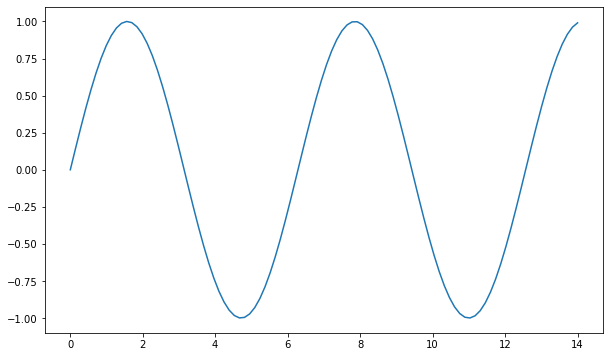

In [3]:
x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2 * np.sin( x + 0.5 )
y3 = 4 * np.sin( x + 1.0 )

plt.figure(figsize = (10,6) )
plt.plot(x, y1)

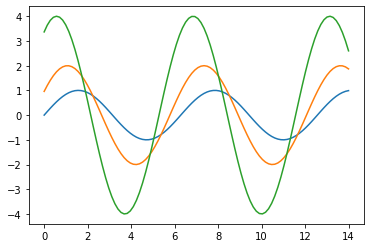

In [4]:
plt.plot(x, y1,x, y2, x, y3)

### 새로운 스타일 적용

In [5]:
sns.set_style("whitegrid")

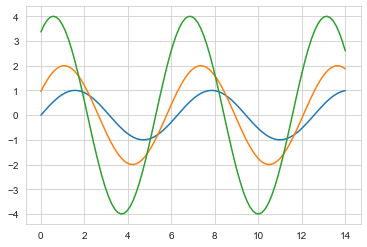

In [6]:
plt.plot(x, y1, x, y2, x, y3)

* set_style in seaborn 이라고 검색하면 그래프 꾸밀 형식을 검색해볼 수 있다.

### 데이터 불러와서 간단한 시각화 해보기

* load_dataset in seaborn 이라고 검색하면 자체적으로 가진 데이터 셋 22개 정도가 있다.

In [7]:
tips = sns.load_dataset("tips")  # 단, 인터넷이 켜져 있어야 한다.
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
type(tips)

pandas.core.frame.DataFrame

In [9]:
type(tips['total_bill'])

pandas.core.series.Series

### 데이터 가져와서 데이터 확인
* [].head() : 앞쪽 행의 데이터 정보 확인()
* [].tail() : 뒤쪽 행의 데이터 정보 확인()
* [].info() : 전반적인 데이터 정보 확인()
* [].describe() : 데이터 요약값 (수치형 데이터)
* [].describe(include=['0']) : 데이터 요약값 (범주형 데이터)
* [].isnull().sum() : 결측치 확인
* [].dtypes : 자료형 확인

#### 데이터 자료형 확인해보기

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [12]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [13]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [15]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

#### 주말이랑 평일의 tips의 차이가 있는지?

<AxesSubplot:xlabel='day', ylabel='count'>

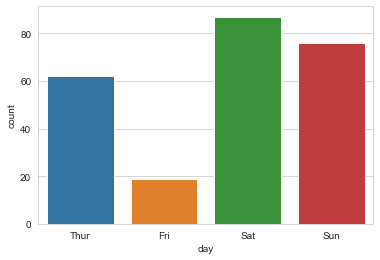

In [16]:
sns.countplot(x='day', data=tips)

* 주말이 상대적으로 tip이 큰 편이다.
* 왜 주말이 tip이 더 클까?

#### smoker 중에 성별 확인이 가능한지?

<AxesSubplot:xlabel='smoker', ylabel='count'>

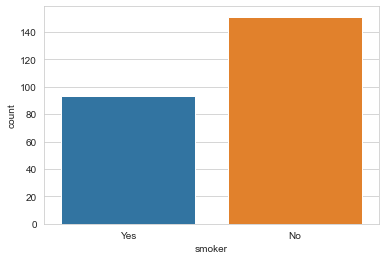

In [17]:
sns.countplot(x='smoker', data=tips)

<AxesSubplot:xlabel='smoker', ylabel='count'>

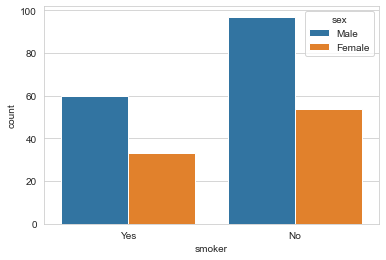

In [19]:
sns.countplot(x='smoker', hue='sex', data=tips)

* 담배를 피우는 사람들(Yes) 중에 60명 정도가 남성, 35명 정도가 여성

#### 흡연자와 비흡연자의 tips 차이가 있는지?

<AxesSubplot:xlabel='smoker', ylabel='tip'>

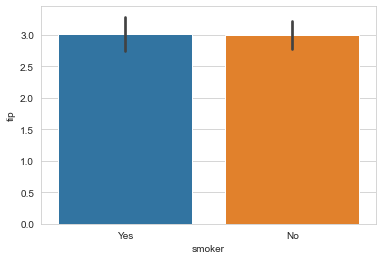

In [20]:
sns.barplot(x='smoker', y='tip', data=tips)

* 차이가 없다.

#### 요일별 흡연자의 tips 확인

<AxesSubplot:xlabel='day', ylabel='tip'>

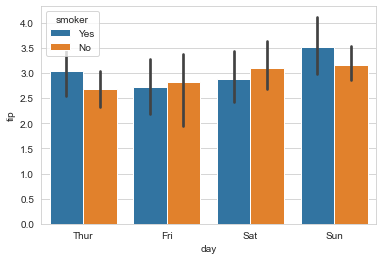

In [21]:
sns.barplot(x='day', y='tip', hue='smoker', data=tips)

* 목요일은 smoker 팁이 많다.
* 금요일은 non-smoker와 큰 차이가 없다.
* 토요일은 non-smoker가 팁이 많다.
* 일요일은 smoker 팁이 많다.

<AxesSubplot:xlabel='day', ylabel='size'>

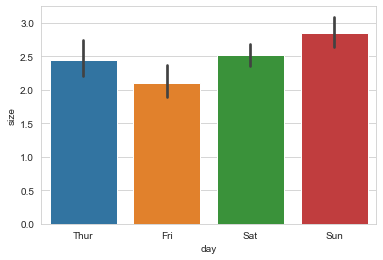

In [22]:
sns.barplot(x='day', y='size', data=tips)

* 요일별 사이즈는 일요일 방문 인원이 가장 많다.
* 가정 적은 인원이 왔을 때는 금요일이다.

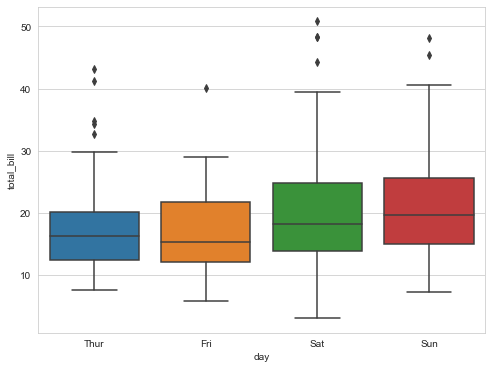

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data=tips)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


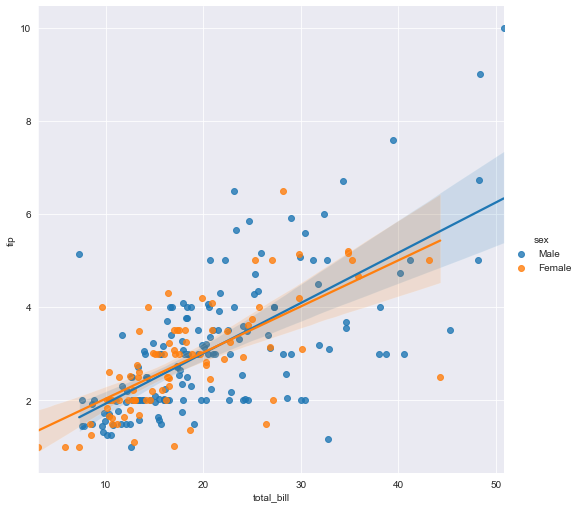

In [24]:
sns.set_style("darkgrid")
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips, size=7)
plt.show()

* 삼점도는 두 변수 간의 상관관계를 본다.